In [2]:
# all packages here
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
import pandas as pd
# import preprocessing from sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

from sklearn.model_selection import train_test_split


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# train = pd.read_csv("amazon-employee-access-challenge/train.csv")
# test = pd.read_csv("amazon-employee-access-challenge/test.csv")


url = 'https://raw.githubusercontent.com/vrishtijain/ML_APPS_Project/master/train.csv'
train = pd.read_csv(url)

url2 = 'https://raw.githubusercontent.com/vrishtijain/ML_APPS_Project/master/test.csv'
test = pd.read_csv(url2)

In [4]:
train.head()
# though it dataset has categorical values but all the fields contain numerical categorical data. Like primary key for for the given attribute. 

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [5]:
X = train.iloc[:,1:]
X= X.iloc[:,:8]
y =train["ACTION"]
print(X.shape, y.shape)

ID = test["id"]
test = test.iloc[:,1:]
test= test.iloc[:,:8]
test.head()

(32769, 8) (32769,)


,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY
0,78766,72734,118079,118080,117878,117879,118177,19721
1,40644,4378,117961,118327,118507,118863,122008,118398
2,75443,2395,117961,118300,119488,118172,301534,249618
3,43219,19986,117961,118225,118403,120773,136187,118960
4,42093,50015,117961,118343,119598,118422,300136,118424


In [6]:
train['ACTION'].value_counts()


1    30872
0     1897
Name: ACTION, dtype: int64

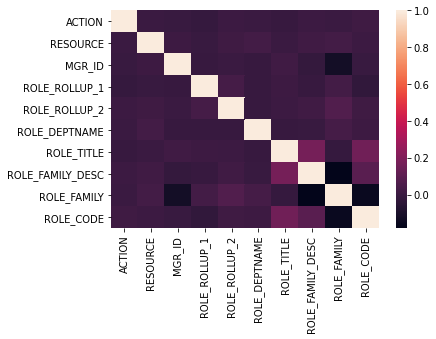

In [7]:
# covraince matrixx
corrMatrix = train.corr()
corrMatrix = corrMatrix.round(3)
heat_map = sns.heatmap(corrMatrix, fmt='g')
plt.show()


# heat_map.savefig('heat_map.png')

In [8]:
corrMatrix

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
ACTION,1.000,0.000,-0.005,-0.014,0.005,0.001,-0.010,0.004,0.001,0.017
RESOURCE,0.000,1.000,0.011,-0.005,0.013,0.030,0.003,0.021,0.031,0.008
MGR_ID,-0.005,0.011,1.000,-0.007,-0.000,-0.010,0.018,-0.018,-0.118,-0.004
ROLE_ROLLUP_1,-0.014,-0.005,-0.007,1.000,0.033,-0.010,0.010,-0.008,0.029,-0.025
ROLE_ROLLUP_2,0.005,0.013,-0.000,0.033,1.000,-0.006,0.008,0.019,0.070,0.015
ROLE_DEPTNAME,0.001,0.030,-0.010,-0.010,-0.006,1.000,-0.007,-0.003,0.032,0.010
ROLE_TITLE,-0.010,0.003,0.018,0.010,0.008,-0.007,1.000,0.171,-0.012,0.156
ROLE_FAMILY_DESC,0.004,0.021,-0.018,-0.008,0.019,-0.003,0.171,1.000,-0.181,0.093
ROLE_FAMILY,0.001,0.031,-0.118,0.029,0.070,0.032,-0.012,-0.181,1.000,-0.149
ROLE_CODE,0.017,0.008,-0.004,-0.025,0.015,0.010,0.156,0.093,-0.149,1.000


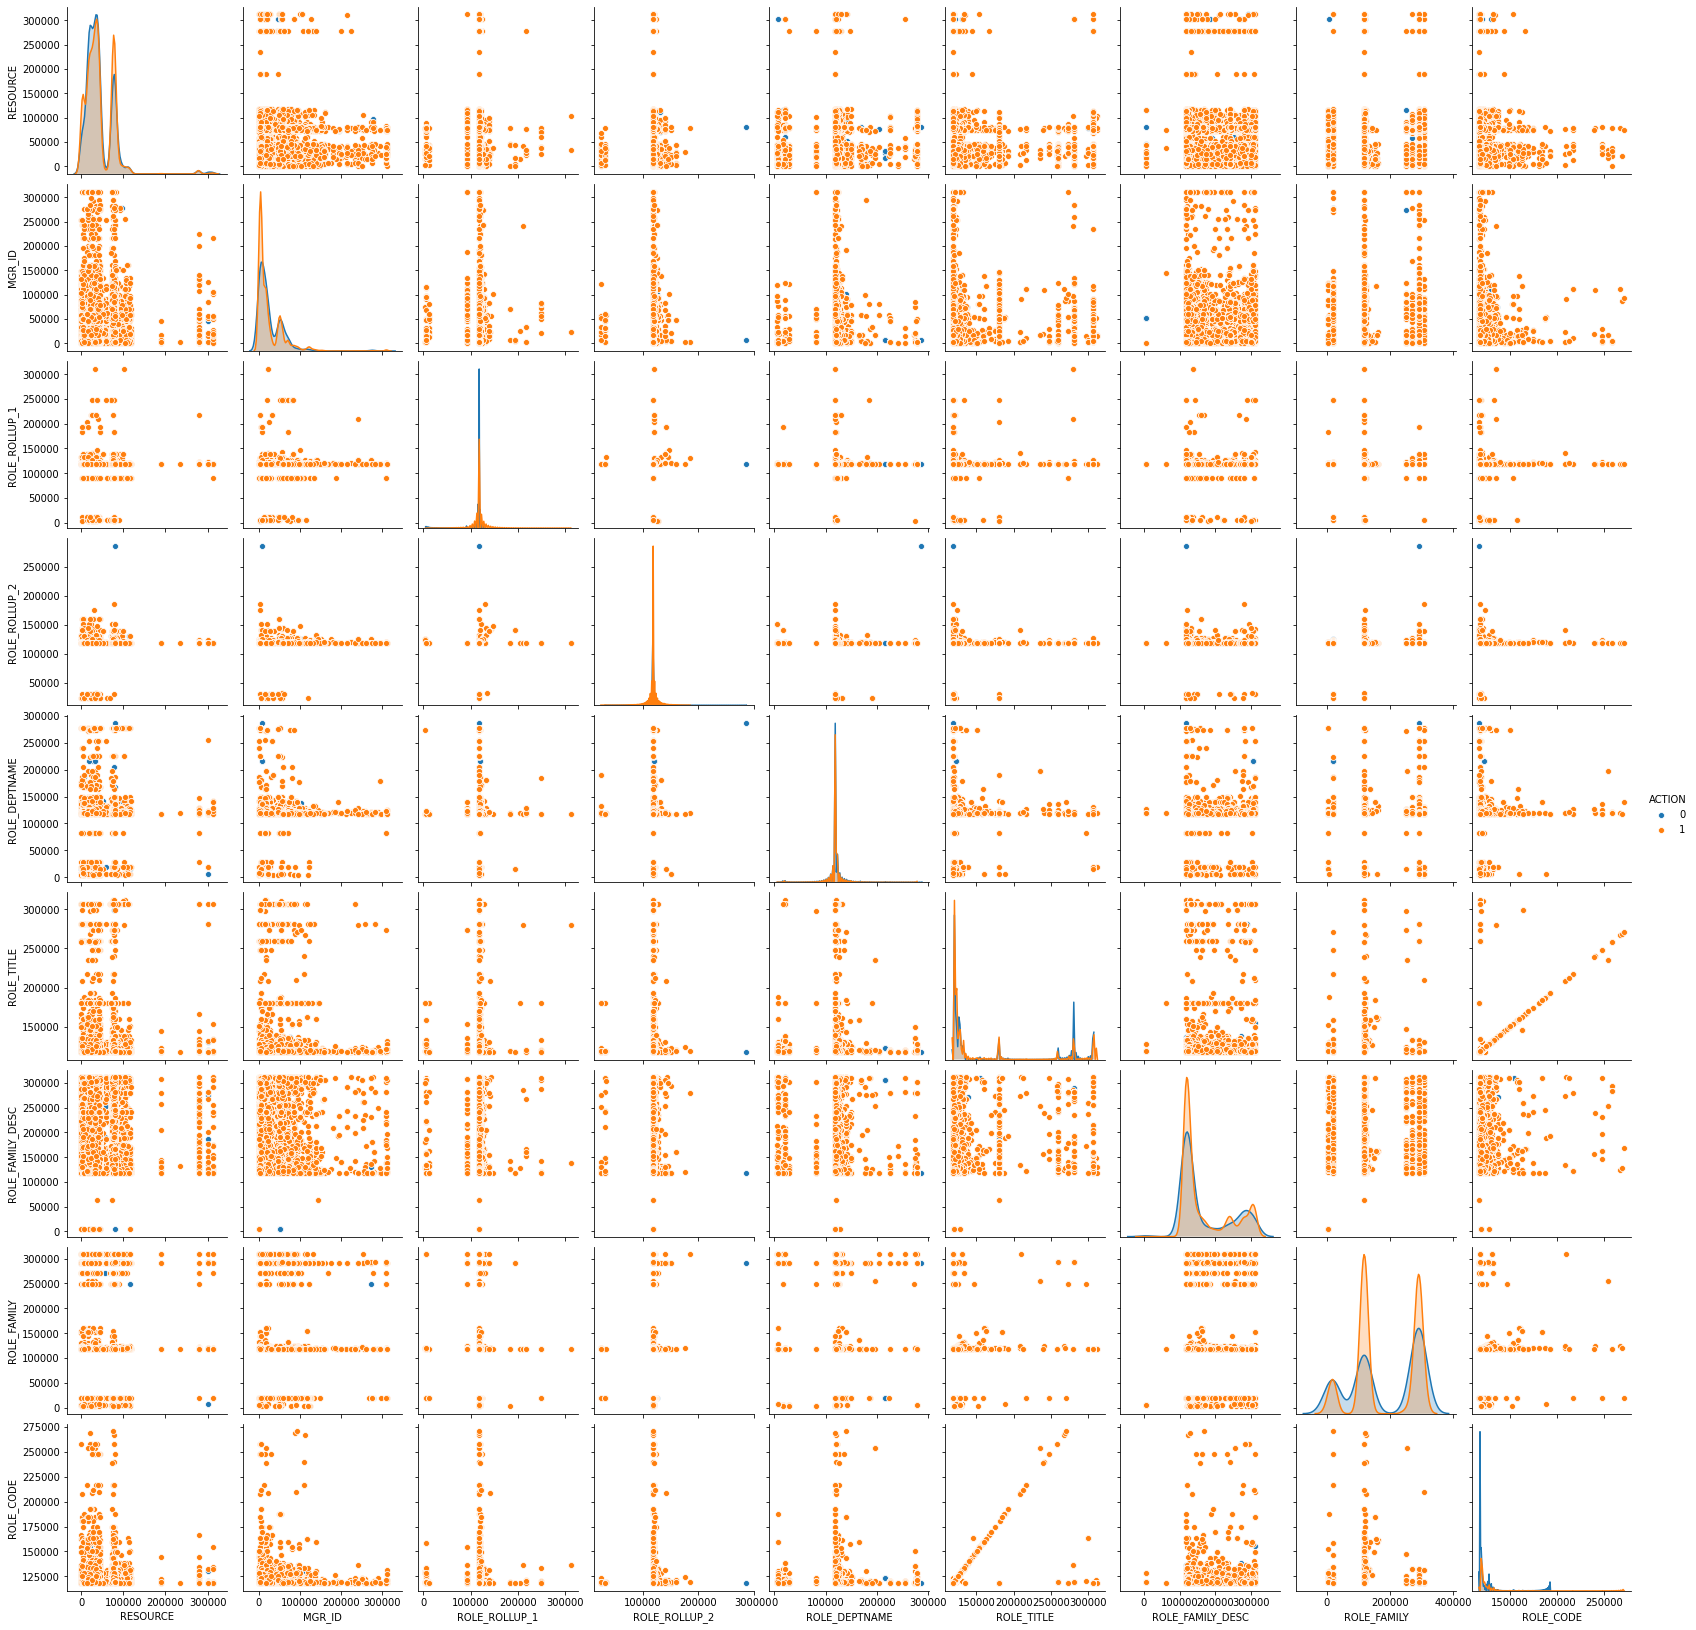

In [9]:
#relationship plot
h = sns.pairplot(train, hue="ACTION")


In [0]:

h.savefig('relationship.png')

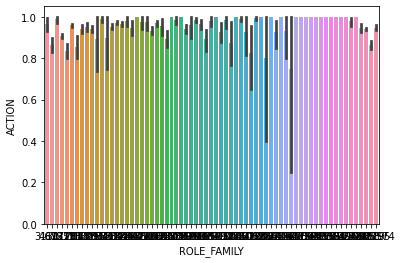

In [11]:
plot2 =sns.barplot(x="ROLE_FAMILY", y ="ACTION", data=train);

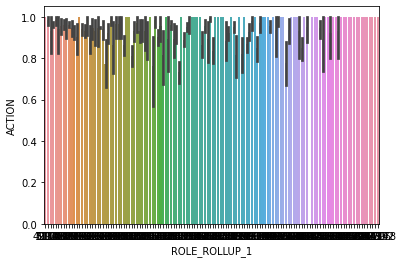

In [12]:
plot3 =sns.barplot(x="ROLE_ROLLUP_1", y ="ACTION", data=train);

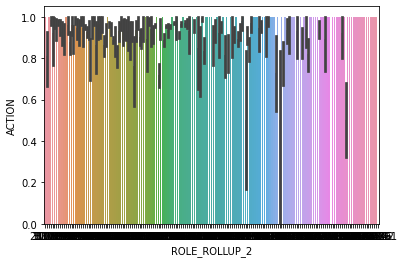

In [13]:
plot4 =sns.barplot(x="ROLE_ROLLUP_2", y ="ACTION", data=train);

In [0]:
#  plt.scatter(train['MGR_ID'] , train['RESOURCE'], c='lightgreen', hue="ACTION")
#  plt.xlabel("MGR_ID")
#  plt.ylabel("RESOURCE")


In [14]:
train.apply(lambda x: len(x.unique()))
# we can see that role_code and role_title has equal number of unique values. It might be the case that both of them are the same. 

ACTION                 2
RESOURCE            7518
MGR_ID              4243
ROLE_ROLLUP_1        128
ROLE_ROLLUP_2        177
ROLE_DEPTNAME        449
ROLE_TITLE           343
ROLE_FAMILY_DESC    2358
ROLE_FAMILY           67
ROLE_CODE            343
dtype: int64

In [15]:
role_code = 'ROLE_CODE'
role_title = 'ROLE_TITLE'

group_two = train.groupby([role_code,role_title]).size()
group_single = train.groupby([role_code]).size()

print( len(group_two), len(group_single))

# this mean both of them signifies the same thing and one of them can be removed.

343 343


In [16]:

LR = LogisticRegression()
LR.fit(X, y) 
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(LR, prefit=True, max_features=4)
feature_idx = model.get_support()
feature_names = X.columns[feature_idx]
X_NEW = model.transform( X)
pd.DataFrame(X_NEW, columns= feature_names)

,ROLE_ROLLUP_2
0,118300
1,118343
2,118220
3,118343
4,117930
...,...
32764,118300
32765,118026
32766,118327
32767,118257


,feature,coef_importance
0,RESOURCE,0.00384553
1,MGR_ID,-0.0137292
2,ROLE_ROLLUP_1,0.00718961
3,ROLE_ROLLUP_2,0.0940656
4,ROLE_DEPTNAME,0.0454694
5,ROLE_TITLE,-0.0238551
6,ROLE_FAMILY_DESC,0.0322806
7,ROLE_FAMILY,0.00315992


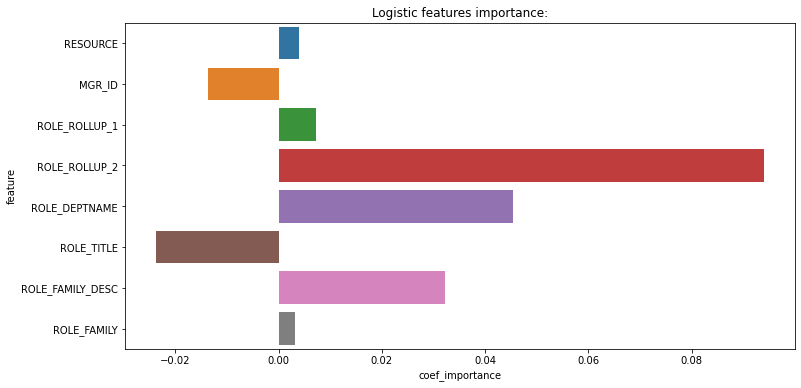

In [17]:
st = np.std(X, 0)
st = st.to_numpy()
st = st.reshape((-1,1)).T
imp_feat= np.multiply(st,LR.coef_)
imp_feat= imp_feat.T
col = np.array(X.columns)
col = col.reshape((-1,1))
# print(imp_feat.shape, col.shape)


feature_importance_coef= pd.DataFrame(np.hstack((col, imp_feat)))


feature_importance_coef.columns = ["feature", "coef_importance"]
feature_importance_coef


plt.figure(figsize=(12, 6));
sns.barplot(x="coef_importance", y="feature", data=feature_importance_coef);
plt.title('Logistic features importance:');
feature_importance_coef

In [18]:
E = ExtraTreesClassifier()
E.fit(X, y) 
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(E, prefit=True, max_features=4)
feature_idx = model.get_support()
feature_names = X.columns[feature_idx]
X_NEW = model.transform( X)
pd.DataFrame(X_NEW, columns= feature_names)

,RESOURCE,MGR_ID
0,39353,85475
1,17183,1540
2,36724,14457
3,36135,5396
4,42680,5905
...,...,...
32764,23497,16971
32765,25139,311198
32766,34924,28805
32767,80574,55643


# Models

In [19]:

# trying extra tree classifer with and checking accuracy on the basis of whether predcited value is same as the true value
# these are all without doing one hot encoding

classifier = LogisticRegression()
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    random_state= 99)

classifier.fit(train_X, train_y)

pre_y= classifier.predict(test_X)
pre_y_train = classifier.predict(train_X)

acc_test = round(np.mean(pre_y == test_y),3)
acc_train = round(np.mean(pre_y_train == train_y),3)
print("Test Accuracy", acc_test,"and Train Accuracy" ,acc_train)



Test Accuracy 0.94 and Train Accuracy 0.943


In [0]:
# predicting the target for the test provided by the kaggle 
pred_test= classifier.predict(test)


# generatting file for the kaggle submission
ans= pd.DataFrame()
ans["id"] = ID
ans["Action"] = pred_test

ans.to_csv("logistic.csv", index=False)

In [21]:
# trying extra tree classifer with and checking accuracy on the basis of whether predcited value is same as the true value
# here is the extra tree classifier
classifier = E
#splitting  in 7:3 ratio
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    random_state= 99)
# fitting on train data 
classifier.fit(train_X, train_y)

pre_y= classifier.predict(test_X)
pre_y_train = classifier.predict(train_X)



acc_test = round(np.mean(pre_y == test_y),3)
acc_train = round(np.mean(pre_y_train == train_y),3)
print(acc_test, acc_train)



0.943 1.0


In [0]:

# predicting the target for the test provided by the kaggle 
pred_test= classifier.predict(test)

# generatting file for the kaggle submission

ans= pd.DataFrame()
ans["id"] = ID
ans["Action"] = pred_test

ans.to_csv("ETC.csv", index=False)

In [23]:


# trying Extra Tree classifier with respect to the important features.
new_x = X[['RESOURCE', 'MGR_ID', 'ROLE_DEPTNAME']]
train_X, test_X, train_y, test_y = train_test_split(new_x, y, 
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    random_state= 99)

classifier.fit(train_X, train_y)

pre_y= classifier.predict(test_X)
pre_y_train = classifier.predict(train_X)

acc_test = round(np.mean(pre_y == test_y),3)
acc_train = round(np.mean(pre_y_train == train_y),3)
print(acc_test, acc_train)


new_test = test[['RESOURCE', 'MGR_ID', 'ROLE_DEPTNAME']]
pred_test= classifier.predict(new_test)


# creating file for submission in kaggle.
ans= pd.DataFrame()
ans["id"] = ID
ans["Action"] = pred_test

ans.to_csv("ETC_feature.csv", index=False)

0.934 0.997


In [24]:
!pip install catboost

In [25]:
#trying cat boost classifer. 

import catboost
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score


model = CatBoostClassifier(iterations=5,
                           learning_rate=0.001,
                           depth=2)
# train_X, test_X, train_y, test_y = train_test_split(X, y, 
#                                                     train_size=0.5,
#                                                     test_size=0.3,
#                                                     random_state= 99)

# classifier.fit(train_X, train_y)

# pre_y= classifier.predict(test_X)
# pre_y_train = classifier.predict(train_X)

# acc_test = round(np.mean(pre_y == test_y),3)
# acc_train = round(np.mean(pre_y_train == train_y),3)
# print("Test Accuracy", acc_test,"and Train Accuracy" ,acc_train)

cv = cross_validate(model, X, y, groups=None, scoring='roc_auc', 
                       cv=3, n_jobs=3, return_train_score = True)
cv = pd.DataFrame(cv)
cv.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fit_time,3.0,0.148988,0.063430,0.106381,0.112540,0.118699,0.170292,0.221884
score_time,3.0,0.009461,0.003007,0.007698,0.007725,0.007753,0.010343,0.012933
test_score,3.0,0.544272,0.017321,0.524274,0.539140,0.554007,0.554272,0.554536
train_score,3.0,0.552375,0.010772,0.542761,0.546554,0.550346,0.557181,0.564017


In [26]:
# adding one hot encoding:


enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit_transform(X)

# 3. Transform
onehotlabels_X = enc.transform(X).toarray()
onehotlabels_X.shape

enc.fit_transform(test)

# 3. Transform
onehotlabels_test = enc.transform(test).toarray()

print(onehotlabels_test.shape,onehotlabels_X.shape)


# trying Extra tree classifer

(58921, 13597) (32769, 15283)


In [27]:

#trying the logsitic regression classifier with cross validation where scoring is roc_auc score 
model = LogisticRegression(
             
                C=1.0, 
                fit_intercept=True, 
                random_state=99,
                solver = 'liblinear',
                max_iter = 1000,
        )

skf = StratifiedKFold(n_splits=5, random_state = 99, shuffle = True)
cv = cross_validate(model, onehotlabels_X, y, groups=None, scoring='roc_auc', 
                       cv=skf, n_jobs=None, return_train_score = True)
cv = pd.DataFrame(cv)
cv.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fit_time,5.0,3.361004,0.240700,3.240874,3.245426,3.259791,3.267784,3.791146
score_time,5.0,0.137872,0.002976,0.134592,0.137069,0.137219,0.137752,0.142729
test_score,5.0,0.866070,0.010076,0.856945,0.858161,0.862105,0.873098,0.880042
train_score,5.0,0.974147,0.000672,0.973149,0.973805,0.974369,0.974612,0.974802


In [28]:
classifier = CatBoostClassifier(iterations=5,
                           learning_rate=0.001,
                           depth=2, loss_function='Logloss', random_seed=42,eval_metric='AUC')

train_X, test_X, train_y, test_y = train_test_split(onehotlabels_X, y, 
                                                    train_size=0.5,
                                                    test_size=0.3,
                                                    random_state= 99)

classifier.fit(train_X, train_y)

pre_y= classifier.predict(test_X)
pre_y_train = classifier.predict(train_X)

acc_test = round( roc_auc_score(test_y,pre_y ),3)
acc_train = round(roc_auc_score(train_y, pre_y_train ),3)
print("Test Accuracy", acc_test,"and Train Accuracy" ,acc_train)




0:	total: 60.7ms	remaining: 243ms
1:	total: 71.2ms	remaining: 107ms
2:	total: 82.2ms	remaining: 54.8ms
3:	total: 93.1ms	remaining: 23.3ms
4:	total: 104ms	remaining: 0us
Test Accuracy 0.5 and Train Accuracy 0.5


In [29]:

# just cheking whether the predicted class ws equal to original class
acc_test = round(np.mean(pre_y == test_y),3)
acc_train = round(np.mean(pre_y_train == train_y),3)
print("Test Accuracy", acc_test,"and Train Accuracy" ,acc_train)

Test Accuracy 0.94 and Train Accuracy 0.944


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.500


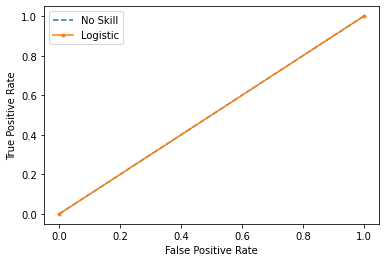

In [30]:
# source / reference : https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
from sklearn.metrics import roc_curve
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(test_y))]

ns_auc = roc_auc_score(test_y, ns_probs)
lr_auc = roc_auc_score(test_y, pre_y)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(test_y, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(test_y, pre_y)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [31]:
#trying the ExtraTreesClassifier with cross validation where scoring is roc_auc score 
model = ExtraTreesClassifier(

               n_estimators = 100,
               criterion ="gini",
               max_depth = 4,
               random_state= 100,
               warm_start = True
               
        )
skf = StratifiedKFold(n_splits=5, random_state = 4141, shuffle = True)
cv = cross_validate(model, onehotlabels_X, y, groups=None, scoring='roc_auc', 
                       cv=skf, n_jobs=None, return_train_score = True)
cv = pd.DataFrame(cv)
cv.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fit_time,5.0,21.771858,0.333998,21.506982,21.535741,21.637749,21.865084,22.313735
score_time,5.0,0.313208,0.003908,0.309435,0.309666,0.312468,0.316416,0.318053
test_score,5.0,0.736633,0.016691,0.713986,0.727848,0.736004,0.750425,0.754901
train_score,5.0,0.784772,0.009731,0.772461,0.780356,0.782356,0.791293,0.797397


In [32]:

new_x = X[['RESOURCE', 'MGR_ID', 'ROLE_DEPTNAME']]
# 2. FIT
enc.fit_transform(new_x)

# 3. Transform
new_x = enc.transform(new_x).toarray()
skf = StratifiedKFold(n_splits=5, random_state = 0, shuffle = True)
cv = cross_validate(model, new_x, y, groups=None, scoring='roc_auc', 
                       cv=skf, n_jobs=None, return_train_score = True)
cv = pd.DataFrame(cv)
cv.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fit_time,5.0,18.454846,0.032069,18.421571,18.427474,18.449018,18.485473,18.490696
score_time,5.0,0.264282,0.003884,0.261034,0.261369,0.262858,0.265779,0.270368
test_score,5.0,0.679823,0.007726,0.669909,0.673455,0.683676,0.684062,0.688014
train_score,5.0,0.747966,0.006004,0.740860,0.744877,0.745854,0.752713,0.755525
